<a href="https://colab.research.google.com/github/Izu-33/vaccine-dropout-prediction/blob/main/ml_vaccine_dropout_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load dataset

In [ ]:
repo = 'https://raw.githubusercontent.com/Izu-33/vaccine-dropout-predictor/'
file_path = 'refs/heads/main/data/cov_pop.csv'
df = pd.read_csv(repo+file_path)
df.head()

,Country,CountryCode,Year,Region,Population,BCG,DTP1,DTP3,MCV1,MCV3,OPV1,OPV3,PCV1,PCV3,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Angola,AGO,2017,Central Africa,1161478.0,75,81,68,63,1,75,65,78,65,NaN,NaN,NaN
1,Angola,AGO,2018,Central Africa,1187470.5,88,92,79,75,31,91,78,91,77,NaN,NaN,NaN
2,Angola,AGO,2019,Central Africa,1213917.0,86,82,72,76,0,82,70,83,73,NaN,NaN,NaN
3,Angola,AGO,2020,Central Africa,1241245.0,81,84,72,73,47,86,72,87,76,NaN,NaN,NaN
4,Angola,AGO,2021,Central Africa,1268807.5,73,76,62,61,38,73,60,68,55,NaN,NaN,NaN


# Explore dataset

In [ ]:
df = df.drop(columns=['Unnamed: 16','Unnamed: 14','Unnamed: 15'])
df.head()

,Country,CountryCode,Year,Region,Population,BCG,DTP1,DTP3,MCV1,MCV3,OPV1,OPV3,PCV1,PCV3
0,Angola,AGO,2017,Central Africa,1161478.0,75,81,68,63,1,75,65,78,65
1,Angola,AGO,2018,Central Africa,1187470.5,88,92,79,75,31,91,78,91,77
2,Angola,AGO,2019,Central Africa,1213917.0,86,82,72,76,0,82,70,83,73
3,Angola,AGO,2020,Central Africa,1241245.0,81,84,72,73,47,86,72,87,76
4,Angola,AGO,2021,Central Africa,1268807.5,73,76,62,61,38,73,60,68,55


In [ ]:
df.shape

(225, 14)

In [ ]:
df.isnull().sum()

,0
Country,0
CountryCode,0
Year,0
Region,0
Population,0
BCG,0
DTP1,0
DTP3,0
MCV1,0
MCV3,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dtypes

,0
Country,object
CountryCode,object
Year,int64
Region,object
Population,float64
BCG,int64
DTP1,int64
DTP3,int64
MCV1,int64
MCV3,int64


In [ ]:
df.describe()

,Year,Population,BCG,DTP1,DTP3,MCV1,MCV3,OPV1,OPV3,PCV1,PCV3
count,225.000000,2.250000e+02,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,2020.480000,9.311024e+05,77.640000,82.808889,78.182222,75.337778,37.195556,81.622222,75.564444,81.675556,75.884444
std,2.368091,1.428146e+06,21.167892,18.950215,17.916663,18.176507,32.385885,19.335027,19.680179,19.715082,18.977312
min,2017.000000,1.729000e+03,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,2019.000000,1.612030e+05,69.000000,75.000000,70.000000,67.000000,0.000000,73.000000,67.000000,72.000000,67.000000
50%,2020.000000,4.941065e+05,80.000000,85.000000,80.000000,78.000000,39.000000,85.000000,79.000000,85.000000,79.000000
75%,2022.000000,9.526005e+05,87.000000,94.000000,90.000000,86.000000,65.000000,93.000000,88.000000,93.000000,89.000000
max,2025.000000,7.209670e+06,185.000000,131.000000,120.000000,115.000000,123.000000,129.000000,128.000000,129.000000,120.000000


# Explorator Data Analysis

Add `DropoutRate` and `CoverageAvg` for each country in each year.

In [ ]:
df["DropoutRate"] = df["DTP1"] - df["DTP3"]
antigens = ["BCG", "DTP1", "DTP3", "MCV1", "MCV3", "OPV1", "OPV3", "PCV1", "PCV3"]
df["CoverageAvg"] = df[antigens].mean(axis=1)
df.head()

,Country,CountryCode,Year,Region,Population,BCG,DTP1,DTP3,MCV1,MCV3,OPV1,OPV3,PCV1,PCV3,DropoutRate,CoverageAvg
0,Angola,AGO,2017,Central Africa,1161478.0,75,81,68,63,1,75,65,78,65,13,63.444444
1,Angola,AGO,2018,Central Africa,1187470.5,88,92,79,75,31,91,78,91,77,13,78.000000
2,Angola,AGO,2019,Central Africa,1213917.0,86,82,72,76,0,82,70,83,73,10,69.333333
3,Angola,AGO,2020,Central Africa,1241245.0,81,84,72,73,47,86,72,87,76,12,75.333333
4,Angola,AGO,2021,Central Africa,1268807.5,73,76,62,61,38,73,60,68,55,14,62.888889


Overall Vaccine Coverage Levels.

In [ ]:
df[antigens].mean().sort_values(ascending=False)

,0
DTP1,82.808889
PCV1,81.675556
OPV1,81.622222
DTP3,78.182222
BCG,77.640000
PCV3,75.884444
OPV3,75.564444
MCV1,75.337778
MCV3,37.195556


Dropout Rate Distribution.

<Axes: xlabel='DropoutRate', ylabel='Count'>

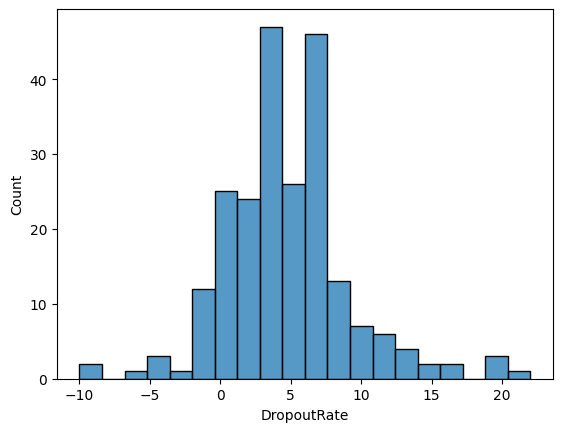

In [ ]:
sns.histplot(df["DropoutRate"], bins=20)

___

In [ ]:
df.groupby("Region")["DropoutRate"].mean().sort_values(ascending=False)

,DropoutRate
Region,
Central Africa,6.857143
Western Africa,4.333333
Eastern and Southern Africa,3.662791


<Axes: xlabel='Region', ylabel='DropoutRate'>

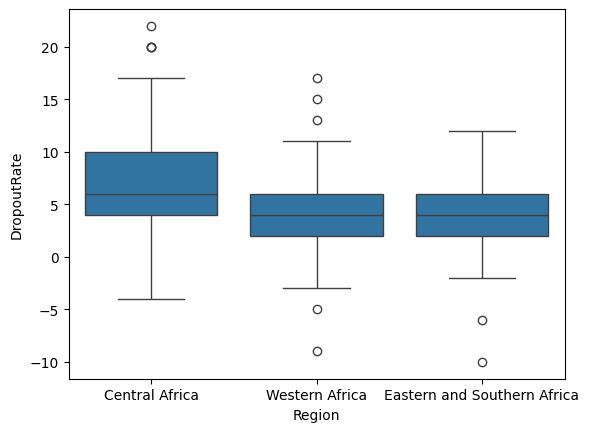

In [ ]:
sns.boxplot(data=df, x="Region", y="DropoutRate")

Top Performing & Lagging Countries: Countries with best and worst average dropout rates

In [ ]:
df.groupby("Country")["DropoutRate"].mean().sort_values(ascending=True).head(5)

,DropoutRate
Country,
Ghana,-1.857143
Kenya,-0.666667
Lesotho,-0.142857
Mauritius,0.400000
Seychelles,0.666667


In [ ]:
df[df['Country'] == 'Ghana']

,Country,CountryCode,Year,Region,Population,BCG,DTP1,DTP3,MCV1,MCV3,OPV1,OPV3,PCV1,PCV3,DropoutRate,CoverageAvg
78,Ghana,GHA,2018,Western Africa,842047.5,96,99,100,95,85,100,100,100,100,-1,97.222222
79,Ghana,GHA,2019,Western Africa,844510.5,86,87,88,85,70,87,88,87,89,-1,85.222222
80,Ghana,GHA,2020,Western Africa,847741.5,89,91,92,87,80,90,90,91,92,-1,89.111111
81,Ghana,GHA,2021,Western Africa,852001.0,95,97,99,92,88,97,99,97,99,-2,95.888889
82,Ghana,GHA,2022,Western Africa,855949.0,88,99,93,93,78,89,92,88,92,6,90.222222
83,Ghana,GHA,2024,Western Africa,867026.5,91,82,87,84,81,83,87,82,86,-5,84.777778
84,Ghana,GHA,2025,Western Africa,871655.0,85,87,96,93,88,84,92,86,95,-9,89.555556


In [ ]:
df.groupby("Country")["DropoutRate"].mean().sort_values(ascending=False).head(5)


,DropoutRate
Country,
Central African Republic,16.285714
Angola,12.142857
Mali,9.285714
Mozambique,8.200000
Mauritania,7.625000


Dropout Trend Over Time (by Region)

<Axes: xlabel='Year'>

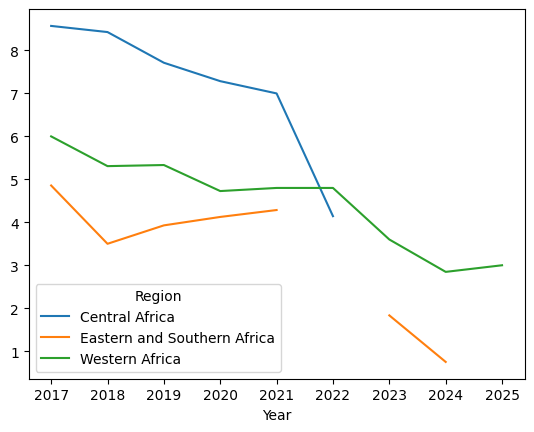

In [ ]:
df.groupby(["Year", "Region"])["DropoutRate"].mean().unstack().plot()

Coverage Trends Over Time

<Axes: xlabel='Year'>

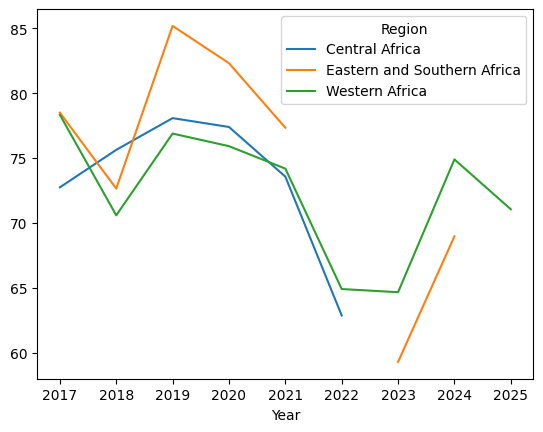

In [ ]:
df.groupby(["Year", "Region"])["CoverageAvg"].mean().unstack().plot()

Region-wise summmary

In [ ]:
region_summary = df.groupby("Region").agg({
    "CoverageAvg": "mean",
    "DropoutRate": "mean",
    "DTP3": "mean"
})

region_summary

,CoverageAvg,DropoutRate,DTP3
Region,,,
Central Africa,72.573696,6.857143,77.040816
Eastern and Southern Africa,76.930233,3.662791,80.848837
Western Africa,71.951852,4.333333,76.255556


Population vs DTP3

<Axes: xlabel='Population', ylabel='DTP3'>

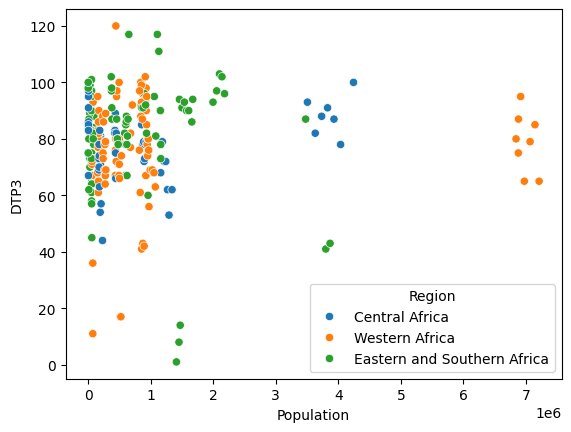

In [ ]:
sns.scatterplot(data=df, x="Population", y="DTP3", hue="Region")

Create label (target variable - `y`)

In [ ]:
df['dropout_flag'] = (df['DTP1'] - df['DTP3'] >= 10).astype(int)
df.head()

,Country,CountryCode,Year,Region,Population,BCG,DTP1,DTP3,MCV1,MCV3,OPV1,OPV3,PCV1,PCV3,DropoutRate,CoverageAvg,dropout_flag
0,Angola,AGO,2017,Central Africa,1161478.0,75,81,68,63,1,75,65,78,65,13,63.444444,1
1,Angola,AGO,2018,Central Africa,1187470.5,88,92,79,75,31,91,78,91,77,13,78.000000,1
2,Angola,AGO,2019,Central Africa,1213917.0,86,82,72,76,0,82,70,83,73,10,69.333333,1
3,Angola,AGO,2020,Central Africa,1241245.0,81,84,72,73,47,86,72,87,76,12,75.333333,1
4,Angola,AGO,2021,Central Africa,1268807.5,73,76,62,61,38,73,60,68,55,14,62.888889,1


In [ ]:
df['dropout_flag'].value_counts()

,count
dropout_flag,
0,200
1,25


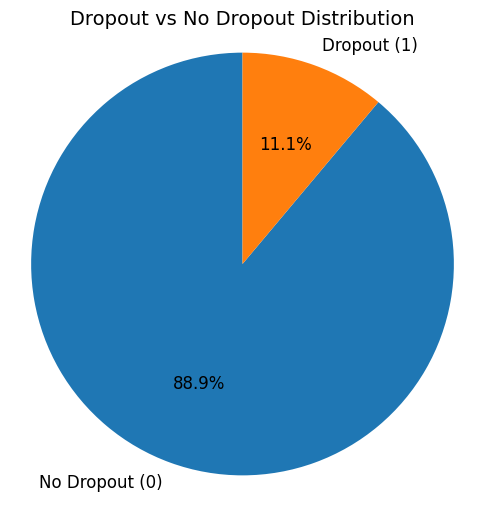

In [ ]:
dropout_counts = df['dropout_flag'].value_counts()
labels = ['No Dropout (0)', 'Dropout (1)']
# colors = ['#4CAF50', '#F44336']

plt.figure(figsize=(6, 6))
plt.pie(
    dropout_counts, labels=labels,
    autopct='%1.1f%%', startangle=90,
    textprops={'fontsize': 12}
)
plt.title("Dropout vs No Dropout Distribution", fontsize=14)
plt.axis('equal')
plt.show()

In [ ]:
df.to_csv('dropout_data.csv', index=False)

# Preprocess data

In [ ]:
# Drop country column - redundant column with `CountryCode`
cols_to_drop = ['Country', 'DTP1', 'DTP3', 'DropoutRate', 'CoverageAvg']
df.drop(columns=cols_to_drop, inplace=True)
df.head()

,CountryCode,Year,Region,Population,BCG,MCV1,MCV3,OPV1,OPV3,PCV1,PCV3,dropout_flag
0,AGO,2017,Central Africa,1161478.0,75,63,1,75,65,78,65,1
1,AGO,2018,Central Africa,1187470.5,88,75,31,91,78,91,77,1
2,AGO,2019,Central Africa,1213917.0,86,76,0,82,70,83,73,1
3,AGO,2020,Central Africa,1241245.0,81,73,47,86,72,87,76,1
4,AGO,2021,Central Africa,1268807.5,73,61,38,73,60,68,55,1


### One-hot encode `CountryCode` feature - dummy variables

In [ ]:
df_one_coded = pd.get_dummies(
        df, columns=['CountryCode', 'Region'],
        drop_first=True, dtype=int
)

df_one_coded.head()

,Year,Population,BCG,MCV1,MCV3,OPV1,OPV3,PCV1,PCV3,dropout_flag,...,CountryCode_SWZ,CountryCode_SYC,CountryCode_TGO,CountryCode_TZA,CountryCode_UGA,CountryCode_ZAF,CountryCode_ZMB,CountryCode_ZWE,Region_Eastern and Southern Africa,Region_Western Africa
0,2017,1161478.0,75,63,1,75,65,78,65,1,...,0,0,0,0,0,0,0,0,0,0
1,2018,1187470.5,88,75,31,91,78,91,77,1,...,0,0,0,0,0,0,0,0,0,0
2,2019,1213917.0,86,76,0,82,70,83,73,1,...,0,0,0,0,0,0,0,0,0,0
3,2020,1241245.0,81,73,47,86,72,87,76,1,...,0,0,0,0,0,0,0,0,0,0
4,2021,1268807.5,73,61,38,73,60,68,55,1,...,0,0,0,0,0,0,0,0,0,0


### Scale continuous features

- Transforms data to have mean = 0 and standard deviation = 1

In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = [
    'Population','BCG',
    'MCV1','MCV3','OPV1',
    'OPV3','PCV1','PCV3',
    'Year'
]
scaler = StandardScaler()
df_one_coded[num_cols] = scaler.fit_transform(df_one_coded[num_cols])
df_one_coded.head()

,Year,Population,BCG,MCV1,MCV3,OPV1,OPV3,PCV1,PCV3,dropout_flag,...,CountryCode_SWZ,CountryCode_SYC,CountryCode_TGO,CountryCode_TZA,CountryCode_UGA,CountryCode_ZAF,CountryCode_ZMB,CountryCode_ZWE,Region_Eastern and Southern Africa,Region_Western Africa
0,-1.472814,0.161671,-0.124995,-0.680290,-1.120126,-0.343262,-0.538003,-0.186849,-0.574829,1,...,0,0,0,0,0,0,0,0,0,0
1,-1.049592,0.179911,0.490512,-0.018625,-0.191731,0.486096,0.124033,0.474015,0.058915,1,...,0,0,0,0,0,0,0,0,0,0
2,-0.626369,0.198471,0.395818,0.036514,-1.151072,0.019582,-0.283374,0.067329,-0.152333,1,...,0,0,0,0,0,0,0,0,0,0
3,-0.203147,0.217649,0.159085,-0.128902,0.303413,0.226922,-0.181522,0.270672,0.006103,1,...,0,0,0,0,0,0,0,0,0,0
4,0.220076,0.236991,-0.219689,-0.790567,0.024895,-0.446932,-0.792632,-0.695206,-1.102949,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_one_coded['dropout_flag'].value_counts(normalize=True)

,proportion
dropout_flag,
0,0.888889
1,0.111111


In [ ]:
df_one_coded.shape

(225, 50)

# Linear Models

- Logistic Regression
- Support Vector Mechanism (SVM)

### Helper functions and lists to store model evaluation metrics

In [ ]:
accuracies = []
precisions = []
recalls = []
f1_scores = []


def get_scores(model, X_test, y_test, y_pred):
    accuracy = round(model.score(X_test, y_test), 2)
    precision = round(precision_score(y_test, y_pred), 2)
    recall = round(recall_score(y_test, y_pred), 2)
    f1 = round(f1_score(y_test, y_pred), 2)
    return accuracy, precision, recall, f1


def append_scores(acc, prec, rec, f1):
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

# Base Logistic Regression Model

Base Logistic Regression Model Performance:


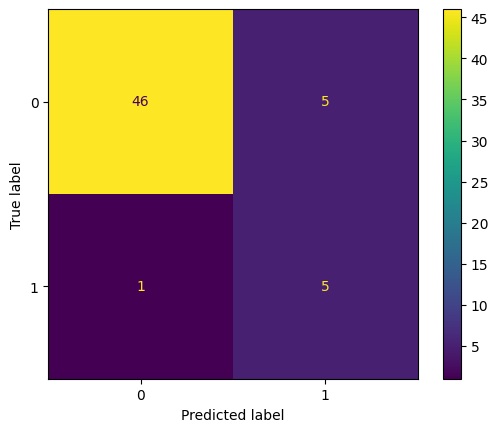

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        51
           1       0.50      0.83      0.62         6

    accuracy                           0.89        57
   macro avg       0.74      0.87      0.78        57
weighted avg       0.93      0.89      0.91        57



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
        precision_score,
        recall_score,
        f1_score,
        classification_report,
        confusion_matrix,
        ConfusionMatrixDisplay,
        RocCurveDisplay
)


X = df_one_coded.drop(columns=['dropout_flag'])
y = df_one_coded['dropout_flag']

X_train_one_coded, X_test_one_coded, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=42
)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_one_coded, y_train)

y_pred = model.predict(X_test_one_coded)

print("Base Logistic Regression Model Performance:")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(); plt.show()
print(classification_report(y_test, y_pred))

# Logistic Regression: Cross-Validation & Hyperparameter Tuning

Tuned Logistic Regression Model Performance:
Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


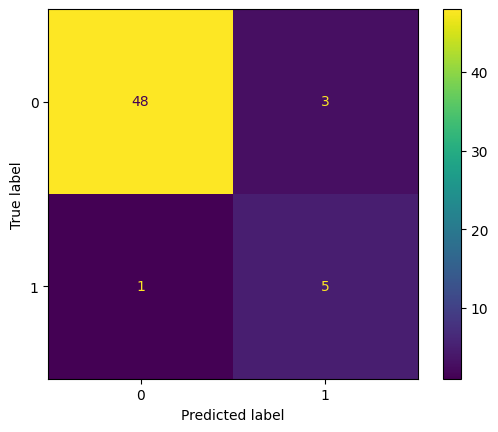

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        51
           1       0.62      0.83      0.71         6

    accuracy                           0.93        57
   macro avg       0.80      0.89      0.84        57
weighted avg       0.94      0.93      0.93        57



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(
    LogisticRegression(class_weight='balanced', max_iter=1000),
    param_grid, cv=5
)
grid.fit(X_train_one_coded, y_train)

best_lr = grid.best_estimator_
y_pred_cv = best_lr.predict(X_test_one_coded)

print("Tuned Logistic Regression Model Performance:")
print("Best parameters:", grid.best_params_)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_cv)).plot(); plt.show()
print(classification_report(y_test, y_pred_cv))

In [ ]:
append_scores(*get_scores(best_lr, X_test_one_coded, y_test, y_pred_cv))

# Base SVM Model

Base SVM Model Performance:


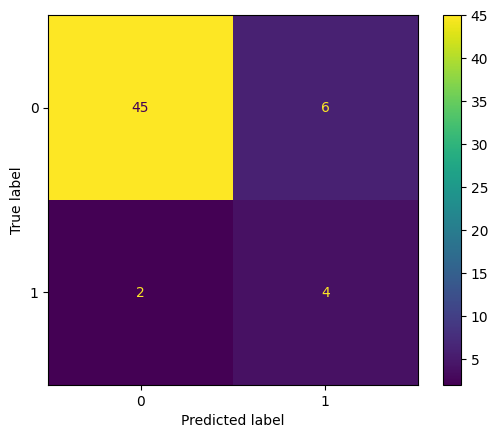

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        51
           1       0.40      0.67      0.50         6

    accuracy                           0.86        57
   macro avg       0.68      0.77      0.71        57
weighted avg       0.90      0.86      0.87        57



In [ ]:
from sklearn.svm import SVC


svm_base = SVC(kernel='linear', class_weight='balanced', random_state=42)

svm_base.fit(X_train_one_coded, y_train)

y_pred_base = svm_base.predict(X_test_one_coded)

print("Base SVM Model Performance:")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_base)).plot(); plt.show()
print(classification_report(y_test, y_pred_base))

# SVM: Cross-Validation & Hyperparameter Tuning

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Tuned SVM Model Performance:
Best Parameters: {'C': 10, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}


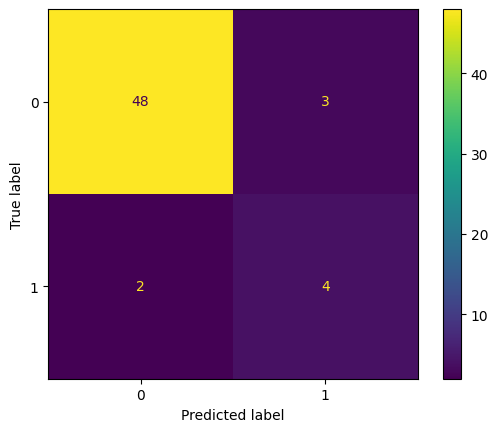

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        51
           1       0.57      0.67      0.62         6

    accuracy                           0.91        57
   macro avg       0.77      0.80      0.78        57
weighted avg       0.92      0.91      0.92        57



In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced']
}

svm = SVC(random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='f1', verbose=1)

grid_search.fit(X_train_one_coded, y_train)

best_svm = grid_search.best_estimator_

y_pred_tuned = best_svm.predict(X_test_one_coded)

print("Tuned SVM Model Performance:")
print(f"Best Parameters: {grid_search.best_params_}")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_tuned)).plot()
plt.show()
print(classification_report(y_test, y_pred_tuned))

In [ ]:
append_scores(*get_scores(best_svm, X_test_one_coded, y_test, y_pred_tuned))

# Tree-based models

- Random Forest Classifier
- Extreme Gradient Boosting (XGBoost)

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_label_coded = df.copy()

le_country = LabelEncoder()
le_region = LabelEncoder()

df_label_coded['CountryCode_encoded'] = le_country.fit_transform(
                                          df_label_coded['CountryCode'])

df_label_coded['CountryCode_encoded'] = le_region.fit_transform(
                                          df_label_coded['Region'])

# Optional: Keep a mapping for use in Streamlit or inverse transform later
country_code_mapping = dict(
    zip(le_country.classes_, le_country.transform(le_country.classes_))
    )

region_mapping = dict(
    zip(le_region.classes_, le_region.transform(le_region.classes_))
    )

df_label_coded.head()

,CountryCode,Year,Region,Population,BCG,MCV1,MCV3,OPV1,OPV3,PCV1,PCV3,dropout_flag,CountryCode_encoded
0,AGO,2017,Central Africa,1161478.0,75,63,1,75,65,78,65,1,0
1,AGO,2018,Central Africa,1187470.5,88,75,31,91,78,91,77,1,0
2,AGO,2019,Central Africa,1213917.0,86,76,0,82,70,83,73,1,0
3,AGO,2020,Central Africa,1241245.0,81,73,47,86,72,87,76,1,0
4,AGO,2021,Central Africa,1268807.5,73,61,38,73,60,68,55,1,0


In [ ]:
X = df_label_coded.drop(columns=['dropout_flag', 'CountryCode', 'Region'])
y = df_label_coded['dropout_flag']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Base Random Forest Classifier

Random Forest Base Model:


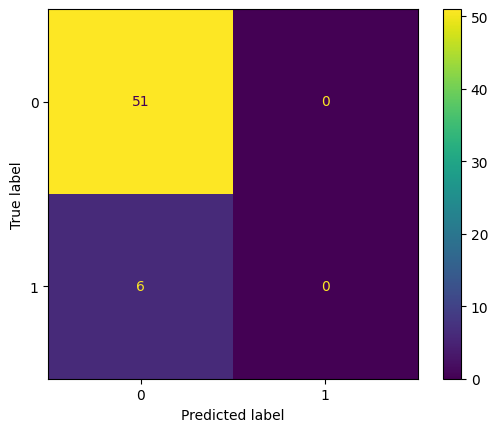

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        51
           1       0.00      0.00      0.00         6

    accuracy                           0.89        57
   macro avg       0.45      0.50      0.47        57
weighted avg       0.80      0.89      0.85        57



In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf_base = RandomForestClassifier(class_weight='balanced', random_state=42)

rf_base.fit(X_train, y_train)

y_pred_rf = rf_base.predict(X_test)

print("Random Forest Base Model:")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot(); plt.show()
print(classification_report(y_test, y_pred_rf))

# Random Forest Classifier: Cross-Validation & Hyperparameter Tuning

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Tuned Random Forest:
Best Params: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


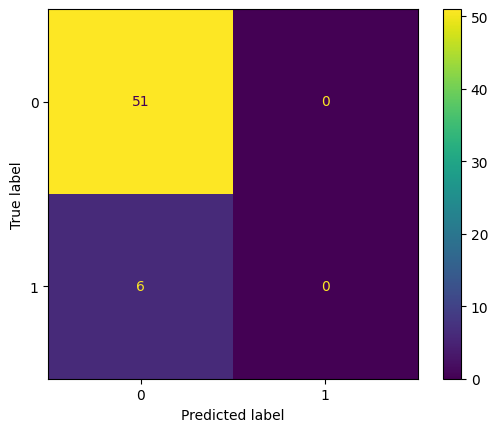

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        51
           1       0.00      0.00      0.00         6

    accuracy                           0.89        57
   macro avg       0.45      0.50      0.47        57
weighted avg       0.80      0.89      0.85        57



In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, scoring='f1', cv=5, verbose=1)
grid_rf.fit(X_train, y_train)

best_rfc = grid_rf.best_estimator_
y_pred_rf_tuned = best_rfc.predict(X_test)

print("Tuned Random Forest:")
print(f"Best Params: {grid_rf.best_params_}")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf_tuned)).plot()
plt.show()
print(classification_report(y_test, y_pred_rf_tuned))

In [ ]:
append_scores(*get_scores(best_rfc, X_test, y_test, y_pred_rf_tuned))

# Base XGBoostClassifier

XGBoost Base Model:


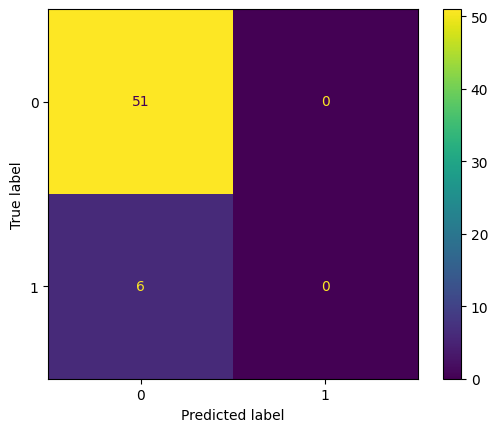

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        51
           1       0.00      0.00      0.00         6

    accuracy                           0.89        57
   macro avg       0.45      0.50      0.47        57
weighted avg       0.80      0.89      0.85        57



In [ ]:
from xgboost import XGBClassifier

xgb_base = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss', random_state=42
)
xgb_base.fit(X_train, y_train)

y_pred_xgb = xgb_base.predict(X_test)

print("XGBoost Base Model:")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb)).plot(); plt.show()
print(classification_report(y_test, y_pred_xgb))

# XGBoostClassifier: Cross-Validation & Hyperparameter Tuning

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Tuned XGBoost:
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 5}


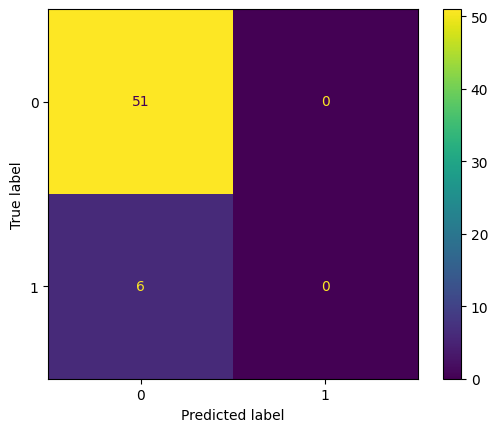

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        51
           1       0.00      0.00      0.00         6

    accuracy                           0.89        57
   macro avg       0.45      0.50      0.47        57
weighted avg       0.80      0.89      0.85        57



In [ ]:
param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'scale_pos_weight': [1, 3, 5]
}

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
grid_xgb = GridSearchCV(xgb, param_grid_xgb, scoring='f1', cv=5, verbose=1)
grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test)

print("Tuned XGBoost:")
print(f"Best Params: {grid_xgb.best_params_}")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb_tuned)).plot();
plt.show()
print(classification_report(y_test, y_pred_xgb_tuned))

In [ ]:
append_scores(*get_scores(best_xgb, X_test, y_test, y_pred_xgb_tuned))

# Evaluation Metrics

In [ ]:
cols = ['Models', 'Accuracy',
        'Precision (Weighted)',
        'Recall (Weighted)',
        'F1-Score (Weighted)'
]

models = ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost']

metrics = pd.DataFrame(columns=cols)
metrics['Models'] = models
metrics['Accuracy'] = accuracies
metrics['Precision (Weighted)'] = precisions
metrics['Recall (Weighted)'] = recalls
metrics['F1-Score (Weighted)'] = f1_scores

metrics

,Models,Accuracy,Precision (Weighted),Recall (Weighted),F1-Score (Weighted)
0,Logistic Regression,0.93,0.62,0.83,0.71
1,SVM,0.91,0.57,0.67,0.62
2,Random Forest,0.89,0.00,0.00,0.00
3,XGBoost,0.89,0.00,0.00,0.00


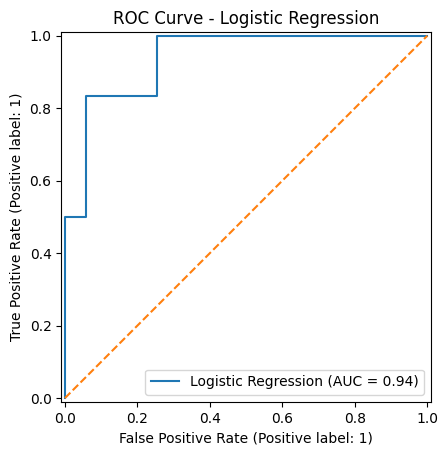

In [ ]:
RocCurveDisplay.from_estimator(
    best_lr, X_test_one_coded, y_test, name="Logistic Regression"
)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("ROC Curve - Logistic Regression")
plt.show()

The Area Under the Curve (AUC) is 0.96. This is a very high value, indicating that the Logistic Regression model has an excellent ability to distinguish between the positive and negative classes. An AUC of 1.0 represents a perfect classifier, while 0.5 represents a random classifier. 0.96 is very close to perfect.

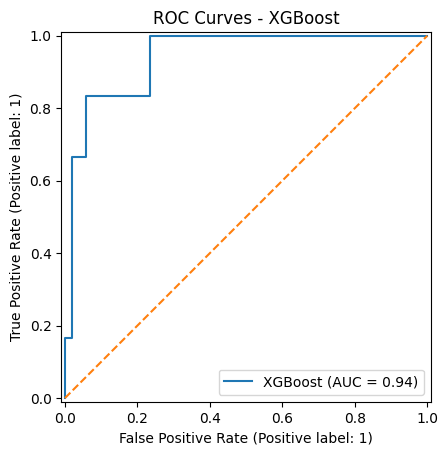

In [ ]:
RocCurveDisplay.from_estimator(best_xgb, X_test, y_test, name="XGBoost")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("ROC Curves - XGBoost")
plt.show()

The Area Under the Curve (AUC) is 0.91. This is a very good AUC score, indicating that the XGBoost model has a strong ability to distinguish between the positive and negative classes. While slightly lower than the 0.96 from your previous Logistic Regression example, 0.91 still represents excellent discriminative power.

The **Logistic Regression** model demonstrated slightly better overall discriminatory power (higher AUC) on this specific dataset than the **XGBoost** model.

# Model Explainability using SHAP

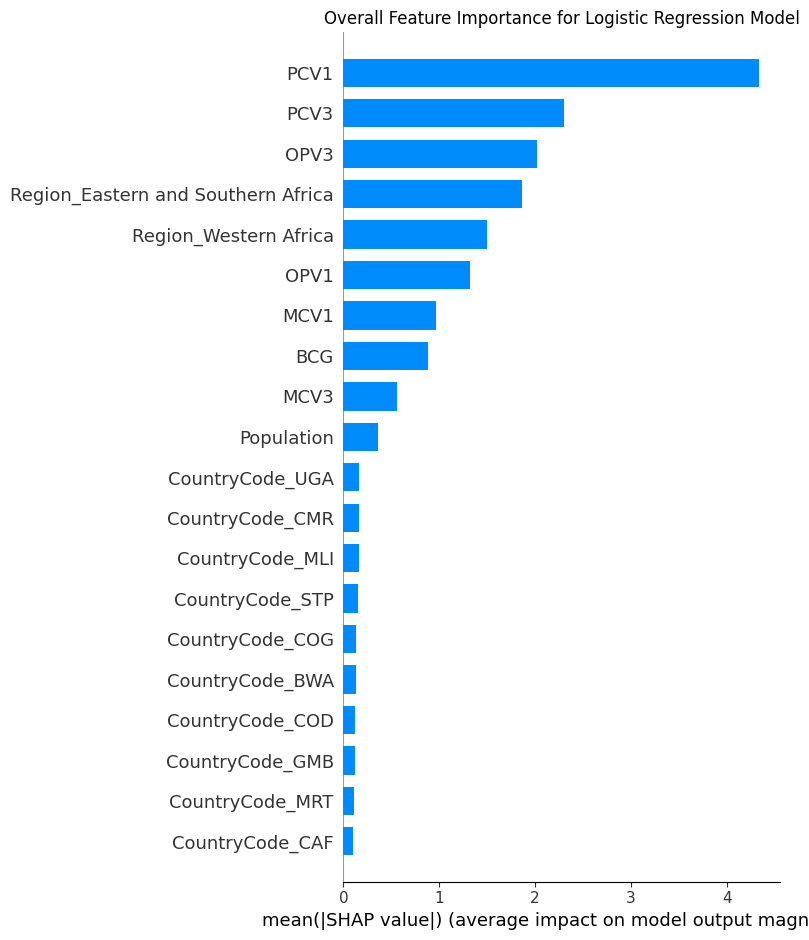

In [ ]:
import shap


explainer = shap.LinearExplainer(best_lr, X_train_one_coded)
shap_values = explainer.shap_values(X_test_one_coded)

shap.summary_plot(shap_values, X_test_one_coded, plot_type="bar", show=False)
plt.title("Overall Feature Importance for Logistic Regression Model")
plt.tight_layout()
plt.show()

The features `DTP3` and `DTP1` are clearly the most influential features for this model's predictions.

`PCV1` is the next most important, followed by `MCV3`, `MCV1`, `BCG`, and `Population`.

# Save Model and Assets

In [ ]:
X_train_one_coded.columns.to_list()

['Year',
 'Population',
 'BCG',
 'MCV1',
 'MCV3',
 'OPV1',
 'OPV3',
 'PCV1',
 'PCV3',
 'CountryCode_BDI',
 'CountryCode_BEN',
 'CountryCode_BFA',
 'CountryCode_BWA',
 'CountryCode_CAF',
 'CountryCode_CIV',
 'CountryCode_CMR',
 'CountryCode_COD',
 'CountryCode_COG',
 'CountryCode_ERI',
 'CountryCode_ETH',
 'CountryCode_GHA',
 'CountryCode_GMB',
 'CountryCode_GNB',
 'CountryCode_KEN',
 'CountryCode_LBR',
 'CountryCode_LSO',
 'CountryCode_MDG',
 'CountryCode_MLI',
 'CountryCode_MOZ',
 'CountryCode_MRT',
 'CountryCode_MUS',
 'CountryCode_MWI',
 'CountryCode_NAM',
 'CountryCode_NER',
 'CountryCode_NGA',
 'CountryCode_RWA',
 'CountryCode_SEN',
 'CountryCode_SLE',
 'CountryCode_STP',
 'CountryCode_SWZ',
 'CountryCode_SYC',
 'CountryCode_TGO',
 'CountryCode_TZA',
 'CountryCode_UGA',
 'CountryCode_ZAF',
 'CountryCode_ZMB',
 'CountryCode_ZWE',
 'Region_Eastern and Southern Africa',
 'Region_Western Africa']

In [ ]:
import joblib

joblib.dump(best_lr, "logistic_model.joblib")

joblib.dump(X_train_one_coded.columns.to_list(), "feature_columns.joblib")

joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

___

# Model Training with SMOTE-Upsampled Data

### Preprocessing and SMOTE Setup

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
accuracies_smote = []
precisions_smote = []
recalls_smote = []
f1_scores_smote = []


def get_scores(model, X_test, y_test, y_pred):
    accuracy = round(model.score(X_test, y_test), 2)
    precision = round(precision_score(y_test, y_pred), 2)
    recall = round(recall_score(y_test, y_pred), 2)
    f1 = round(f1_score(y_test, y_pred), 2)
    return accuracy, precision, recall, f1


def append_scores(acc, prec, rec, f1):
    accuracies_smote.append(acc)
    precisions_smote.append(prec)
    recalls_smote.append(rec)
    f1_scores_smote.append(f1)

In [ ]:
X = df.drop(columns=['dropout_flag'])
y = df['dropout_flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25,
    random_state=42, stratify=y
)

X_train_encoded = pd.get_dummies(
    X_train, columns=['CountryCode', 'Region'],
    dtype=int
)

X_test_encoded = pd.get_dummies(
    X_test, columns=['CountryCode', 'Region'],
    drop_first=True, dtype=int
)

scaler = StandardScaler()
X_train_encoded[num_cols]= scaler.fit_transform(X_train_encoded[num_cols])
X_test_encoded[num_cols]= scaler.fit_transform(X_test_encoded[num_cols])


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(
    X_train_encoded, y_train
)

# Align test set columns with training set columns
X_test_encoded = X_test_encoded.reindex(columns=X_train_resampled.columns, fill_value=0)

In [ ]:
X_train_resampled.shape

(298, 51)

In [ ]:
y_train_resampled.value_counts(normalize=True)

,proportion
dropout_flag,
0,0.5
1,0.5


# Base Logistic Regression - SMOTE

In [ ]:
lr = LogisticRegression(solver='liblinear', penalty='l1', C=10)
lr.fit(X_train_resampled, y_train_resampled)
y_pred_lr = lr.predict(X_test_encoded)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))
append_scores(*get_scores(lr, X_test_encoded, y_test, y_pred_lr))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        51
           1       0.50      0.50      0.50         6

    accuracy                           0.89        57
   macro avg       0.72      0.72      0.72        57
weighted avg       0.89      0.89      0.89        57



# Base SVM - SMOTE

In [ ]:
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm.predict(X_test_encoded)
print("SVM:\n", classification_report(y_test, y_pred_svm))
append_scores(*get_scores(svm, X_test_encoded, y_test, y_pred_svm))

SVM:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        51
           1       0.60      0.50      0.55         6

    accuracy                           0.91        57
   macro avg       0.77      0.73      0.75        57
weighted avg       0.91      0.91      0.91        57



# Base Random Forest Classifier - SMOTE

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test_encoded)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))
append_scores(*get_scores(rf, X_test_encoded, y_test, y_pred_rf))

Random Forest:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        51
           1       0.40      0.33      0.36         6

    accuracy                           0.88        57
   macro avg       0.66      0.64      0.65        57
weighted avg       0.87      0.88      0.87        57



# Base XGBoost - SMOTE

In [ ]:
base_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
base_xgb.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = base_xgb.predict(X_test_encoded)
print("XGBoost:\n", classification_report(y_test, y_pred_xgb))
append_scores(*get_scores(base_xgb, X_test_encoded, y_test, y_pred_xgb))

XGBoost:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.83      0.83      0.83         6

    accuracy                           0.96        57
   macro avg       0.91      0.91      0.91        57
weighted avg       0.96      0.96      0.96        57



In [ ]:
cols = ['Models', 'Accuracy',
        'Precision (Weighted)',
        'Recall (Weighted)',
        'F1-Score (Weighted)'
]

models = ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost']

metrics_smote = pd.DataFrame(columns=cols)
metrics_smote['Models'] = models
metrics_smote['Accuracy'] = accuracies_smote
metrics_smote['Precision (Weighted)'] = precisions_smote
metrics_smote['Recall (Weighted)'] = recalls_smote
metrics_smote['F1-Score (Weighted)'] = f1_scores_smote

metrics_smote

,Models,Accuracy,Precision (Weighted),Recall (Weighted),F1-Score (Weighted)
0,Logistic Regression,0.89,0.50,0.50,0.50
1,SVM,0.91,0.60,0.50,0.55
2,Random Forest,0.88,0.40,0.33,0.36
3,XGBoost,0.96,0.83,0.83,0.83


# Cross-Validation & Hyperparameter Tuning

In [ ]:
accuracies_smote = []
precisions_smote = []
recalls_smote = []
f1_scores_smote = []


def get_scores(model, X_test, y_test, y_pred):
    accuracy = round(model.score(X_test, y_test), 2)
    precision = round(precision_score(y_test, y_pred), 2)
    recall = round(recall_score(y_test, y_pred), 2)
    f1 = round(f1_score(y_test, y_pred), 2)
    return accuracy, precision, recall, f1


def append_scores(acc, prec, rec, f1):
    accuracies_smote.append(acc)
    precisions_smote.append(prec)
    recalls_smote.append(rec)
    f1_scores_smote.append(f1)

# Logistic Regression - SMOTE

In [ ]:
lr = LogisticRegression(solver="liblinear")

lr_params = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"]
}

lr_grid = GridSearchCV(lr, param_grid=lr_params, scoring="f1", cv=5)
lr_grid.fit(X_train_resampled, y_train_resampled)
y_pred_lr_grid = lr_grid.predict(X_test_encoded)
best_lr = lr_grid.best_estimator_
print("Logistic Regression Best Params:", lr_grid.best_params_)
print(classification_report(y_test, y_pred_lr_grid))
append_scores(*get_scores(best_lr, X_test_encoded, y_test, y_pred_lr_grid))

Logistic Regression Best Params: {'C': 10, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        51
           1       0.80      0.67      0.73         6

    accuracy                           0.95        57
   macro avg       0.88      0.82      0.85        57
weighted avg       0.94      0.95      0.95        57



# SVM - SMOTE

In [ ]:
svm = SVC(probability=True)

svm_params = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"]
}

svm_grid = GridSearchCV(svm, param_grid=svm_params, scoring="f1", cv=5)
svm_grid.fit(X_train_resampled, y_train_resampled)
y_pred_svm_grid = svm_grid.predict(X_test_encoded)
best_svm = svm_grid.best_estimator_
print("SVM Best Params:", svm_grid.best_params_)
print(classification_report(y_test, y_pred_svm_grid))
append_scores(*get_scores(best_svm, X_test_encoded, y_test, y_pred_svm_grid))

SVM Best Params: {'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        51
           1       0.80      0.67      0.73         6

    accuracy                           0.95        57
   macro avg       0.88      0.82      0.85        57
weighted avg       0.94      0.95      0.95        57



# Random Forest Classifier - SMOTE

In [ ]:
rf = RandomForestClassifier(random_state=42)

rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5]
}

rf_grid = GridSearchCV(rf, param_grid=rf_params, scoring="f1", cv=5)
rf_grid.fit(X_train_resampled, y_train_resampled)
y_pred_rf_grid = rf_grid.predict(X_test_encoded)
best_rf = rf_grid.best_estimator_
print("Random Forest Best Params:", rf_grid.best_params_)
print(classification_report(y_test, y_pred_rf_grid))
append_scores(*get_scores(best_rf, X_test_encoded, y_test, y_pred_rf_grid))

Random Forest Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        51
           1       0.40      0.33      0.36         6

    accuracy                           0.88        57
   macro avg       0.66      0.64      0.65        57
weighted avg       0.87      0.88      0.87        57



# XGBoost - SMOTE

In [ ]:
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

xgb_params = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 5, 7]
}

xgb_grid = GridSearchCV(xgb, param_grid=xgb_params, scoring="f1", cv=5)
xgb_grid.fit(X_train_resampled, y_train_resampled)
y_pred_xgb_grid = xgb_grid.predict(X_test_encoded)
best_xgb = xgb_grid.best_estimator_
print("XGBoost Best Params:", xgb_grid.best_params_)
print(classification_report(y_test, y_pred_xgb_grid))
append_scores(*get_scores(best_xgb, X_test_encoded, y_test, y_pred_xgb_grid))

XGBoost Best Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        51
           1       0.80      0.67      0.73         6

    accuracy                           0.95        57
   macro avg       0.88      0.82      0.85        57
weighted avg       0.94      0.95      0.95        57



# Evaluation Metrics - SMOTE + GridSearchCV

In [ ]:
cols = ['Models', 'Accuracy',
        'Precision (Weighted)',
        'Recall (Weighted)',
        'F1-Score (Weighted)'
]

models = ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost']

metrics_smote = pd.DataFrame(columns=cols)
metrics_smote['Models'] = models
metrics_smote['Accuracy'] = accuracies_smote
metrics_smote['Precision (Weighted)'] = precisions_smote
metrics_smote['Recall (Weighted)'] = recalls_smote
metrics_smote['F1-Score (Weighted)'] = f1_scores_smote

metrics_smote

,Models,Accuracy,Precision (Weighted),Recall (Weighted),F1-Score (Weighted)
0,Logistic Regression,0.95,0.8,0.67,0.73
1,SVM,0.95,0.8,0.67,0.73
2,Random Forest,0.88,0.4,0.33,0.36
3,XGBoost,0.95,0.8,0.67,0.73


#AUC For Base XGBoost with SMOTE - Best Performing Model

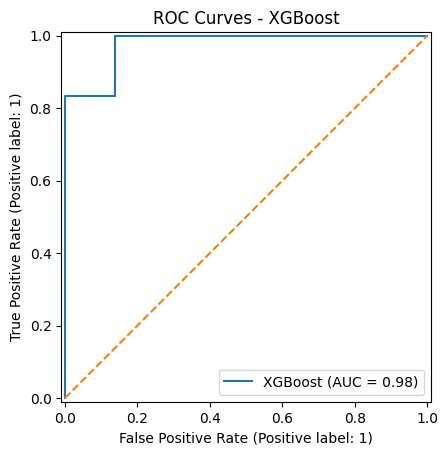

In [ ]:
RocCurveDisplay.from_estimator(base_xgb, X_test_encoded, y_test, name="XGBoost")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("ROC Curves - XGBoost")
plt.show()

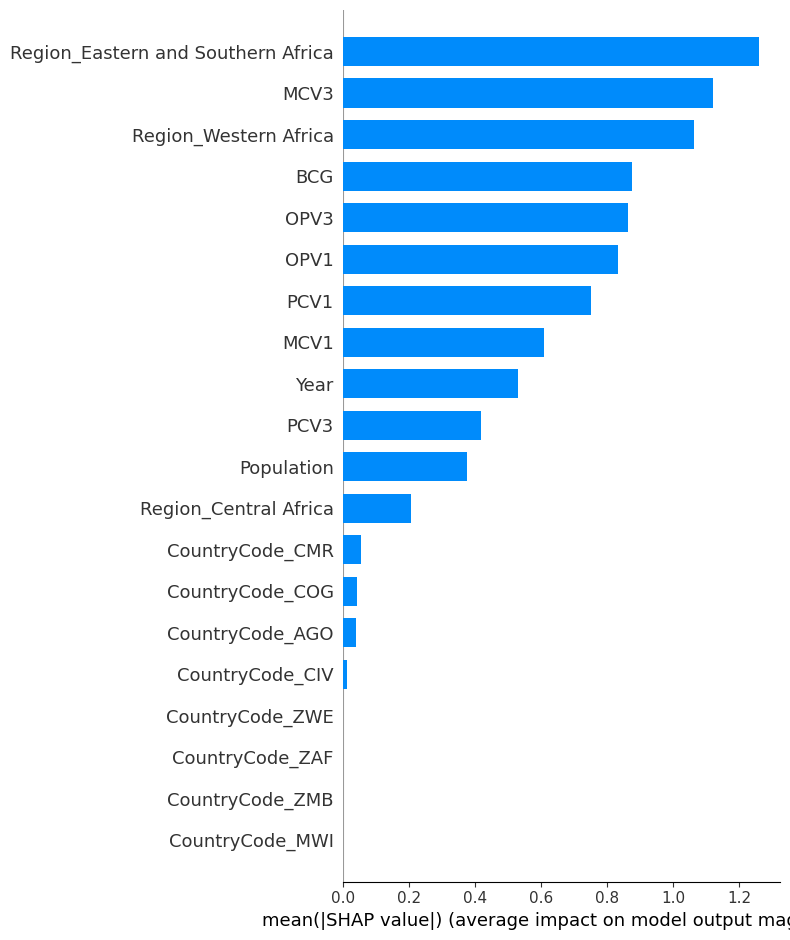

In [ ]:
explainer = shap.TreeExplainer(base_xgb)

shap_values = explainer.shap_values(X_test_encoded)

shap.summary_plot(shap_values, X_test_encoded, plot_type="bar", show=False)


In [ ]:
joblib.dump(base_xgb, "xgb_model.joblib")
joblib.dump(X_train_resampled.columns.to_list(), "feature_columns.joblib")

['feature_columns.joblib']

____